# 코로나19 전/후 강의평 비교 분석

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# load libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter

from utils import *

In [3]:
# load dataset
data = pd.read_csv('../data/2020LectureReview.csv', index_col=0)

In [4]:
# make before/after COVID-19 column
data['COVID-19'] = data['ReviewSemester'].apply(lambda x: 'before' if x not in ['20년 1학기 수강자', '20년 2학기 수강자'] else 'after')

In [5]:
data.head()

,LectureUrl,LectureName,LectureProf,ReviewStar,ReviewSemester,ReviewText,COVID-19
0,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,100.0,20년 1학기 수강자,시험 잘 멋본 것 같은데 에이제로 떠서 놀람 감사합니다 교수님,after
1,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,80.0,20년 1학기 수강자,"에 뭐,,, 그냥 괜찮았는데 자습기간을 안 주고 전범위 시험본다그러니까 당황스러웠네...",after
2,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,80.0,19년 1학기 수강자,한국은행 금융통화위원을 지내고 오신 교수님이시라 그런지 간간히 들려주시는 교수님의 ...,before
3,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,100.0,19년 1학기 수강자,교수님 너무 똑똑하시고 피피티 위주로 수업하시기는 하는데 현장경험이 풍부하셔서 그런...,before
4,https://yonsei.everytime.kr/lecture/view/943471,학교교실의현장연구방법입문,박순용,80.0,20년 1학기 수강자,매주 온라인 강의를 늦게 올려주셔서 불편했지만 수업 내용은 무난하고 좋았습니다. 매...,after


## Task1 : 전체 강의평에 대하여 토픽 모델링 진행 후 코로나 전/후 강의평 토픽 비교

### Preprocessing

In [6]:
data_, text_tokenized_ = Preprocessor(data, list(data['ReviewText'].values))
data_.head()

,LectureUrl,LectureName,LectureProf,ReviewStar,ReviewSemester,ReviewText,COVID-19,TextPreprocessed,TokenCnt
0,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,100.0,20년 1학기 수강자,시험 잘 멋본 것 같은데 에이제로 떠서 놀람 감사합니다 교수님,after,시험 이제 떠서 놀람 감사 교수,6
1,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,80.0,20년 1학기 수강자,"에 뭐,,, 그냥 괜찮았는데 자습기간을 안 주고 전범위 시험본다그러니까 당황스러웠네...",after,그냥 괜찮 자습 기간 범위 시험 본다 그러니까 당황 스러웠 교수 똑똑 나쁘 다만 시...,21
2,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,80.0,19년 1학기 수강자,한국은행 금융통화위원을 지내고 오신 교수님이시라 그런지 간간히 들려주시는 교수님의 ...,before,한국은행 금융 통화 위원 지내 교수 그런지 간간히 들려 교수 현장 쏠쏠 재미 중간고...,41
3,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,100.0,19년 1학기 수강자,교수님 너무 똑똑하시고 피피티 위주로 수업하시기는 하는데 현장경험이 풍부하셔서 그런...,before,교수 똑똑 피피티 위주 현장 경험 풍부 그런지 설명,9
4,https://yonsei.everytime.kr/lecture/view/943471,학교교실의현장연구방법입문,박순용,80.0,20년 1학기 수강자,매주 온라인 강의를 늦게 올려주셔서 불편했지만 수업 내용은 무난하고 좋았습니다. 매...,after,매주 온라인 강의 올려 불편 내용 무난 매주 출석 과제 기말 연구 보고서 기말 온라...,44


### Topic Modeling (LDA)

In [7]:
# topic modeling => topic list
f = open('Task1_topic_list.txt', 'w')
print('========== Topic List ==========')
corpus_, lda_ = ModelingLDA(text_tokenized_)
f.close()

========== Topic List ==========
(0, '0.089*"학점" + 0.049*"강의" + 0.037*"과목" + 0.036*"무조건" + 0.034*"그냥"')
(1, '0.028*"사람" + 0.028*"모르" + 0.025*"그냥" + 0.020*"교수" + 0.018*"아니"')
(2, '0.077*"강의" + 0.054*"영상" + 0.038*"동영상" + 0.032*"올려" + 0.026*"질문"')
(3, '0.061*"과제" + 0.037*"모임" + 0.031*"교수" + 0.024*"학점" + 0.023*"부담"')
(4, '0.081*"내용" + 0.024*"흥미" + 0.021*"문제" + 0.017*"주제" + 0.017*"논문"')
(5, '0.091*"시험" + 0.047*"공부" + 0.035*"피피티" + 0.031*"필기" + 0.027*"외우"')
(6, '0.082*"영어" + 0.049*"교수" + 0.044*"강의" + 0.039*"조교" + 0.022*"독학"')
(7, '0.099*"ㅋㅋ" + 0.081*"ㅋㅋㅋ" + 0.049*"the" + 0.042*"to" + 0.028*"and"')
(8, '0.115*"출석" + 0.080*"출결" + 0.027*"체크" + 0.025*"결석" + 0.021*"부르"')
(9, '0.064*"강의" + 0.039*"학기" + 0.038*"기준" + 0.038*"과제" + 0.034*"성적"')
(10, '0.080*"문제" + 0.069*"시험" + 0.026*"점수" + 0.019*"퀴즈" + 0.019*"공부"')
(11, '0.070*"시간" + 0.040*"발표" + 0.015*"교수" + 0.015*"토론" + 0.012*"주제"')
(12, '0.168*"교수" + 0.053*"학생" + 0.025*"친절" + 0.022*"강의" + 0.016*"려고"')
(13, '0.045*"교수" + 0.038*"강의" + 0.034*"내용" + 0.0

In [8]:
topic_table_ = MakeTopicTable(corpus_, lda_)

In [9]:
df_ = pd.concat([data_.reset_index(drop=True), topic_table_.reset_index(drop=True)], axis=1)
df_.head()

,LectureUrl,LectureName,LectureProf,ReviewStar,ReviewSemester,ReviewText,COVID-19,TextPreprocessed,TokenCnt,TopicIndex,TopicProportion,TopicList
0,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,100.0,20년 1학기 수강자,시험 잘 멋본 것 같은데 에이제로 떠서 놀람 감사합니다 교수님,after,시험 이제 떠서 놀람 감사 교수,6,14,0.43567,"[(5, 0.15887797), (12, 0.28401068), (14, 0.435..."
1,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,80.0,20년 1학기 수강자,"에 뭐,,, 그냥 괜찮았는데 자습기간을 안 주고 전범위 시험본다그러니까 당황스러웠네...",after,그냥 괜찮 자습 기간 범위 시험 본다 그러니까 당황 스러웠 교수 똑똑 나쁘 다만 시...,21,3,0.28957,"[(1, 0.25765258), (3, 0.28956982), (5, 0.14361..."
2,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,80.0,19년 1학기 수강자,한국은행 금융통화위원을 지내고 오신 교수님이시라 그런지 간간히 들려주시는 교수님의 ...,before,한국은행 금융 통화 위원 지내 교수 그런지 간간히 들려 교수 현장 쏠쏠 재미 중간고...,41,13,0.38230,"[(5, 0.09661087), (10, 0.2542754), (12, 0.0806..."
3,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,100.0,19년 1학기 수강자,교수님 너무 똑똑하시고 피피티 위주로 수업하시기는 하는데 현장경험이 풍부하셔서 그런...,before,교수 똑똑 피피티 위주 현장 경험 풍부 그런지 설명,9,13,0.36192,"[(5, 0.16486974), (12, 0.28641945), (13, 0.361..."
4,https://yonsei.everytime.kr/lecture/view/943471,학교교실의현장연구방법입문,박순용,80.0,20년 1학기 수강자,매주 온라인 강의를 늦게 올려주셔서 불편했지만 수업 내용은 무난하고 좋았습니다. 매...,after,매주 온라인 강의 올려 불편 내용 무난 매주 출석 과제 기말 연구 보고서 기말 온라...,44,9,0.52951,"[(2, 0.040547308), (4, 0.13102348), (5, 0.1612..."


In [10]:
df_.to_csv('Task1_data_with_topic.csv')

In [11]:
before_df_ = df_[df_['COVID-19']=='before']
after_df_ = df_[df_['COVID-19']=='after']

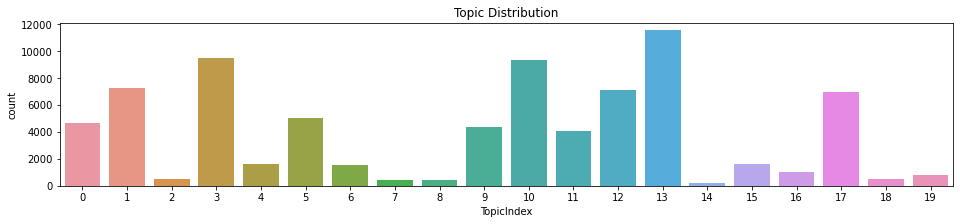

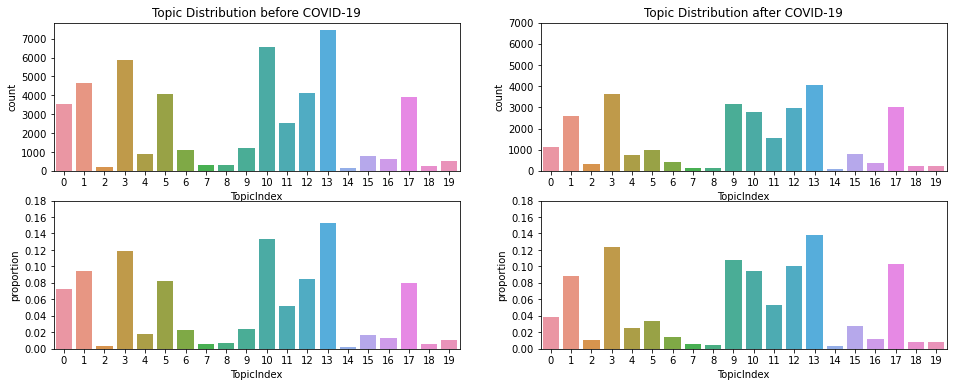

In [12]:
# Topic Distribution

before_temp_ = before_df_.groupby('TopicIndex').count()['LectureUrl']
after_temp_ = after_df_.groupby('TopicIndex').count()['LectureUrl']

fig, ax = plt.subplots(1, 1, figsize=(16, 3))

sns.countplot(x=df_['TopicIndex'])
plt.title('Topic Distribution')

fig, ax = plt.subplots(2, 2, figsize=(16, 6))

plt.subplot(221)
sns.countplot(x=before_df_['TopicIndex'])
plt.yticks(range(0, 7001, 1000))
plt.title('Topic Distribution before COVID-19')

plt.subplot(222)
sns.countplot(x=after_df_['TopicIndex'])
plt.yticks(range(0, 7001, 1000))
plt.title('Topic Distribution after COVID-19')

plt.subplot(223)
sns.barplot(x=before_temp_.index, y=before_temp_.values/len(before_df_))
plt.yticks(np.arange(0, 0.20, 0.02))
plt.ylabel('proportion')

plt.subplot(224)
sns.barplot(x=after_temp_.index, y=after_temp_.values/len(after_df_))
plt.yticks(np.arange(0, 0.20, 0.02))
plt.ylabel('proportion')

plt.show()

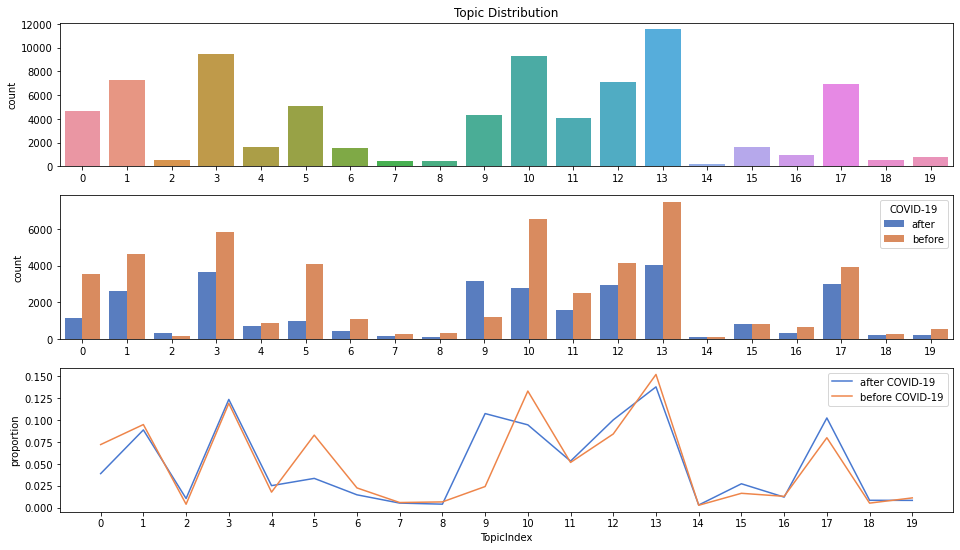

In [13]:
# Compare Topic Distribution before/after COVID19

fig, ax = plt.subplots(3, 1, figsize=(16, 9))

plt.subplot(311)
sns.countplot(x='TopicIndex', data=df_)
plt.xticks(range(0, 20, 1))
plt.xlabel('')
plt.title('Topic Distribution')

plt.subplot(312)
sns.countplot(x='TopicIndex', data=df_, hue='COVID-19', palette='muted')
plt.xticks(range(0, 20, 1))
plt.xlabel('')
plt.ylabel('count')

plt.subplot(313)
sns.lineplot(x=after_temp_.index, y=after_temp_.values/len(after_df_), label='after COVID-19', color=sns.color_palette('muted')[0])
sns.lineplot(x=before_temp_.index, y=before_temp_.values/len(before_df_), label='before COVID-19', color=sns.color_palette('muted')[1])
plt.xticks(range(0, 20, 1))
plt.ylabel('proportion')

plt.show()

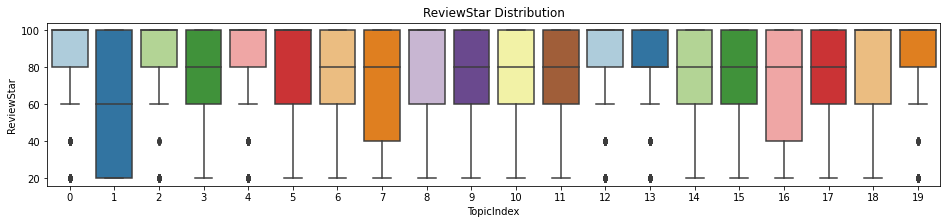

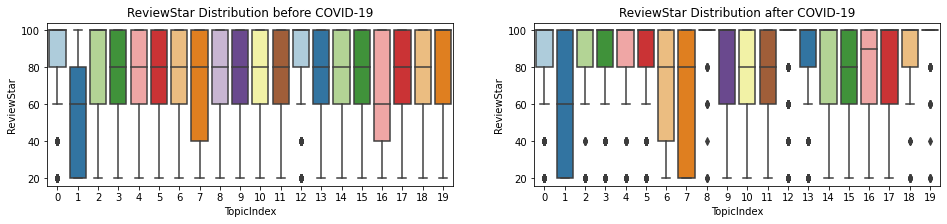

In [14]:
# ReviewStar Distribution

fig, ax = plt.subplots(1, 1, figsize=(16, 3))

sns.boxplot(x='TopicIndex', y='ReviewStar', data=df_, palette='Paired')
plt.title('ReviewStar Distribution')

fig, ax = plt.subplots(1, 2, figsize=(16, 3))

plt.subplot(121)
sns.boxplot(x='TopicIndex', y='ReviewStar', data=before_df_, palette='Paired')
plt.title('ReviewStar Distribution before COVID-19')

plt.subplot(122)
sns.boxplot(x='TopicIndex', y='ReviewStar', data=after_df_, palette='Paired')
plt.title('ReviewStar Distribution after COVID-19')

plt.show()

## Task2 : 코로나 전/후 강의평에 대하여 각각 토픽 모델링 진행 후 코로나 전/후 강의평 토픽 비교

### Preprocessing

In [15]:
before_data = data[data['COVID-19']=='before']
after_data = data[data['COVID-19']=='after']

In [16]:
before_text = list(before_data['ReviewText'].values)
after_text = list(after_data['ReviewText'].values)

In [17]:
before_data, before_text_tokenized = Preprocessor(before_data, before_text)
after_data, after_text_tokenized = Preprocessor(after_data, after_text)

In [18]:
before_data.head()

,LectureUrl,LectureName,LectureProf,ReviewStar,ReviewSemester,ReviewText,COVID-19,TextPreprocessed,TokenCnt
2,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,80.0,19년 1학기 수강자,한국은행 금융통화위원을 지내고 오신 교수님이시라 그런지 간간히 들려주시는 교수님의 ...,before,한국은행 금융 통화 위원 지내 교수 그런지 간간히 들려 교수 현장 쏠쏠 재미 중간고...,41
3,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,100.0,19년 1학기 수강자,교수님 너무 똑똑하시고 피피티 위주로 수업하시기는 하는데 현장경험이 풍부하셔서 그런...,before,교수 똑똑 피피티 위주 현장 경험 풍부 그런지 설명,9
6,https://yonsei.everytime.kr/lecture/view/943471,학교교실의현장연구방법입문,박순용,20.0,18년 2학기 수강자,교수님의 수업은 이해하기 쉬웠고 질적연구와 현장연구에 대해 잘 설명해주셔서 수업은 ...,before,교수 이해 쉬웠 연구 현장 연구 설명 중간고사 비중 성적 산출 아쉬운 부분,13
7,https://yonsei.everytime.kr/lecture/view/943471,학교교실의현장연구방법입문,박순용,100.0,18년 2학기 수강자,개인적이지만 수업 괜찮았고 설명 잘해주심. 성적은 그냥 시험으로 갈리는듯? 조모임 ...,before,개인 괜찮 설명 성적 그냥 시험 갈리 모임 빡세 엄청 자주 만나 조원 만나 헤쳐 나...,47
16,https://yonsei.everytime.kr/lecture/view/2073400,국제이해교육,이무성,40.0,19년 2학기 수강자,교수님 좋고 학구적이고 내용도 좋은데 마이너스 폭격기임^^,before,교수 학구 내용 은데 마이너스 폭격기 ^^,7


In [19]:
after_data.head()

,LectureUrl,LectureName,LectureProf,ReviewStar,ReviewSemester,ReviewText,COVID-19,TextPreprocessed,TokenCnt
0,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,100.0,20년 1학기 수강자,시험 잘 멋본 것 같은데 에이제로 떠서 놀람 감사합니다 교수님,after,시험 이제 떠서 놀람 감사 교수,6
1,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,80.0,20년 1학기 수강자,"에 뭐,,, 그냥 괜찮았는데 자습기간을 안 주고 전범위 시험본다그러니까 당황스러웠네...",after,그냥 괜찮 자습 기간 범위 시험 본다 그러니까 당황 스러웠 교수 똑똑 나쁘 다만 시...,21
4,https://yonsei.everytime.kr/lecture/view/943471,학교교실의현장연구방법입문,박순용,80.0,20년 1학기 수강자,매주 온라인 강의를 늦게 올려주셔서 불편했지만 수업 내용은 무난하고 좋았습니다. 매...,after,매주 온라인 강의 올려 불편 내용 무난 매주 출석 과제 기말 연구 보고서 기말 온라...,44
5,https://yonsei.everytime.kr/lecture/view/943471,학교교실의현장연구방법입문,박순용,20.0,20년 1학기 수강자,조교가 일을 안하는건지 교수가 일을 안하는건지 강의가 맨날 늦게 올라옴 제 시간에 ...,after,조교 건지 교수 건지 강의 맨날 올라옴 시간 강의 니까 열정 초반 부터 사라짐 그러...,21
8,https://yonsei.everytime.kr/lecture/view/1600344,현대독일산문,이진영,100.0,20년 1학기 수강자,이번 학기에 들은 강의 중에 가장 좋았던 수업 중 하나. 교수님께서 학생들 많이 배...,after,학기 강의 가장 하나 교수 학생 배려 강의 필요 학생 감상 이나 해석 개입 참고 배...,53


### EDA

In [20]:
# Number of Texts & tokens

before_counter = Counter(sum(before_text_tokenized, []))
after_counter = Counter(sum(after_text_tokenized, []))

print('COVID-19 이전 전체 강의평 개수: {}개'.format(len(before_text)))
print('COVID-19 이후 전체 강의평 개수: {}개'.format(len(after_text)))

print('COVID-19 이전 전체 토큰 개수: {}개'.format(len(before_counter)))
print('COVID-19 이후 전체 토큰 개수: {}개'.format(len(after_counter)))

COVID-19 이전 전체 강의평 개수: 49127개
COVID-19 이후 전체 강의평 개수: 29423개
COVID-19 이전 전체 토큰 개수: 30011개
COVID-19 이후 전체 토큰 개수: 22865개


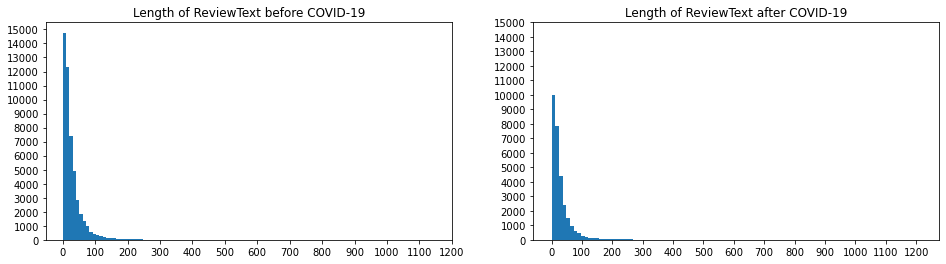

In [21]:
# Length of Texts

fig, ax = plt.subplots(1, 2, figsize=(16, 4))

plt.subplot(121)
plt.hist(before_data['TokenCnt'], bins=100)
plt.xticks(range(0, 1201, 100))
plt.yticks(range(0, 15001, 1000))
plt.title('Length of ReviewText before COVID-19')

plt.subplot(122)
plt.hist(after_data['TokenCnt'], bins=100)
plt.xticks(range(0, 1201, 100))
plt.yticks(range(0, 15001, 1000))
plt.title('Length of ReviewText after COVID-19')

plt.show()

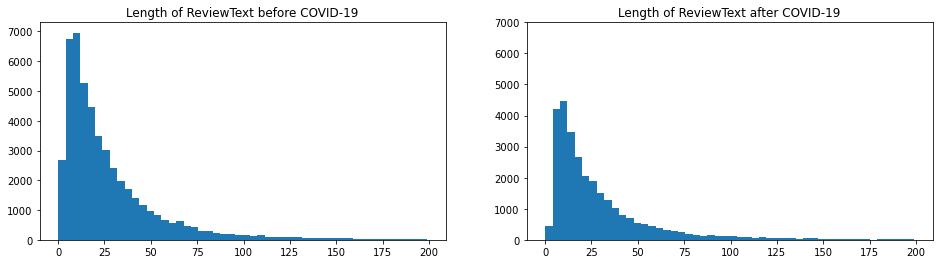

In [22]:
# Length of Texts (zoom-in)

fig, ax = plt.subplots(1, 2, figsize=(16, 4))

plt.subplot(121)
plt.hist(before_data['TokenCnt'][before_data['TokenCnt']<200], bins=50)
plt.xticks(range(0, 201, 25))
plt.yticks(range(0, 7001, 1000))
plt.title('Length of ReviewText before COVID-19')

plt.subplot(122)
plt.hist(after_data['TokenCnt'][after_data['TokenCnt']<200], bins=50)
plt.xticks(range(0, 201, 25))
plt.yticks(range(0, 7001, 1000))
plt.title('Length of ReviewText after COVID-19')

plt.show()

### Topic Modeling (LDA)

In [23]:
f = open('Task2_topic_list.txt', 'w')
print('========== Topic List before COVID-19 ==========')
before_corpus, before_lda = ModelingLDA(before_text_tokenized)
print()
print('========== Topic List after COVID-19 ==========')
after_corpus, after_lda = ModelingLDA(after_text_tokenized)
f.close()

========== Topic List before COVID-19 ==========
(0, '0.061*"공부" + 0.048*"시험" + 0.037*"열심히" + 0.027*"학점" + 0.022*"사람"')
(1, '0.048*"실습" + 0.044*"조교" + 0.044*"코딩" + 0.037*"배우" + 0.033*"ㅎㅎㅎ"')
(2, '0.181*"과제" + 0.094*"퀴즈" + 0.039*"매주" + 0.035*"학점" + 0.031*"귀찮"')
(3, '0.278*".." + 0.111*"..." + 0.103*"ㅋㅋ" + 0.083*"ㅋㅋㅋ" + 0.034*"...."')
(4, '0.117*"출석" + 0.036*"결석" + 0.031*"출결" + 0.031*"부르" + 0.029*"지각"')
(5, '0.074*"채플" + 0.021*"그냥" + 0.016*"of" + 0.016*"종교" + 0.016*"재무"')
(6, '0.056*"교수" + 0.046*"강의" + 0.036*"시험" + 0.032*"내용" + 0.020*"학점"')
(7, '0.159*"수강" + 0.058*"신청" + 0.038*"학기" + 0.033*"계절" + 0.024*"실험"')
(8, '0.021*"생각" + 0.019*"내용" + 0.016*"주제" + 0.014*"발표" + 0.014*"교수"')
(9, '0.066*"문제" + 0.050*"시험" + 0.029*"내용" + 0.024*"교수" + 0.021*"공부"')
(10, '0.211*"교수" + 0.059*"최고" + 0.054*"ㅎㅎ" + 0.040*"재밌" + 0.037*"ㅠㅠ"')
(11, '0.079*"교수" + 0.054*"학생" + 0.016*"질문" + 0.016*"강의" + 0.015*"생각"')
(12, '0.066*"과목" + 0.062*"전공" + 0.059*"지식" + 0.054*"수학" + 0.027*"문과"')
(13, '0.062*"외우" + 0.058*"시험" + 

In [24]:
before_topic_table = MakeTopicTable(before_corpus, before_lda)
after_topic_table = MakeTopicTable(after_corpus, after_lda)

In [25]:
before_df = pd.concat([before_data.reset_index(drop=True), before_topic_table.reset_index(drop=True)], axis=1)
after_df = pd.concat([after_data.reset_index(drop=True), after_topic_table.reset_index(drop=True)], axis=1)

In [26]:
before_df.head()

,LectureUrl,LectureName,LectureProf,ReviewStar,ReviewSemester,ReviewText,COVID-19,TextPreprocessed,TokenCnt,TopicIndex,TopicProportion,TopicList
0,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,80.0,19년 1학기 수강자,한국은행 금융통화위원을 지내고 오신 교수님이시라 그런지 간간히 들려주시는 교수님의 ...,before,한국은행 금융 통화 위원 지내 교수 그런지 간간히 들려 교수 현장 쏠쏠 재미 중간고...,41,6,0.24809,"[(4, 0.029200342), (6, 0.24809301), (8, 0.0359..."
1,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,100.0,19년 1학기 수강자,교수님 너무 똑똑하시고 피피티 위주로 수업하시기는 하는데 현장경험이 풍부하셔서 그런...,before,교수 똑똑 피피티 위주 현장 경험 풍부 그런지 설명,9,15,0.47013,"[(9, 0.3294825), (13, 0.11537117), (15, 0.4701..."
2,https://yonsei.everytime.kr/lecture/view/943471,학교교실의현장연구방법입문,박순용,20.0,18년 2학기 수강자,교수님의 수업은 이해하기 쉬웠고 질적연구와 현장연구에 대해 잘 설명해주셔서 수업은 ...,before,교수 이해 쉬웠 연구 현장 연구 설명 중간고사 비중 성적 산출 아쉬운 부분,13,8,0.36030,"[(5, 0.091161765), (8, 0.360301), (9, 0.236280..."
3,https://yonsei.everytime.kr/lecture/view/943471,학교교실의현장연구방법입문,박순용,100.0,18년 2학기 수강자,개인적이지만 수업 괜찮았고 설명 잘해주심. 성적은 그냥 시험으로 갈리는듯? 조모임 ...,before,개인 괜찮 설명 성적 그냥 시험 갈리 모임 빡세 엄청 자주 만나 조원 만나 헤쳐 나...,47,16,0.35200,"[(1, 0.02214311), (3, 0.022098638), (4, 0.0250..."
4,https://yonsei.everytime.kr/lecture/view/2073400,국제이해교육,이무성,40.0,19년 2학기 수강자,교수님 좋고 학구적이고 내용도 좋은데 마이너스 폭격기임^^,before,교수 학구 내용 은데 마이너스 폭격기 ^^,7,0,0.32251,"[(0, 0.32251048), (3, 0.13146742), (6, 0.29529..."


In [27]:
after_df.head()

,LectureUrl,LectureName,LectureProf,ReviewStar,ReviewSemester,ReviewText,COVID-19,TextPreprocessed,TokenCnt,TopicIndex,TopicProportion,TopicList
0,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,100.0,20년 1학기 수강자,시험 잘 멋본 것 같은데 에이제로 떠서 놀람 감사합니다 교수님,after,시험 이제 떠서 놀람 감사 교수,6,15,0.21561,"[(2, 0.1762178), (13, 0.13688217), (15, 0.2156..."
1,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,80.0,20년 1학기 수강자,"에 뭐,,, 그냥 괜찮았는데 자습기간을 안 주고 전범위 시험본다그러니까 당황스러웠네...",after,그냥 괜찮 자습 기간 범위 시험 본다 그러니까 당황 스러웠 교수 똑똑 나쁘 다만 시...,21,2,0.24527,"[(0, 0.048770968), (2, 0.24527402), (4, 0.1238..."
2,https://yonsei.everytime.kr/lecture/view/943471,학교교실의현장연구방법입문,박순용,80.0,20년 1학기 수강자,매주 온라인 강의를 늦게 올려주셔서 불편했지만 수업 내용은 무난하고 좋았습니다. 매...,after,매주 온라인 강의 올려 불편 내용 무난 매주 출석 과제 기말 연구 보고서 기말 온라...,44,8,0.54471,"[(2, 0.27201992), (3, 0.10791202), (8, 0.54471..."
3,https://yonsei.everytime.kr/lecture/view/943471,학교교실의현장연구방법입문,박순용,20.0,20년 1학기 수강자,조교가 일을 안하는건지 교수가 일을 안하는건지 강의가 맨날 늦게 올라옴 제 시간에 ...,after,조교 건지 교수 건지 강의 맨날 올라옴 시간 강의 니까 열정 초반 부터 사라짐 그러...,21,15,0.28452,"[(3, 0.1920199), (12, 0.19286528), (15, 0.2845..."
4,https://yonsei.everytime.kr/lecture/view/1600344,현대독일산문,이진영,100.0,20년 1학기 수강자,이번 학기에 들은 강의 중에 가장 좋았던 수업 중 하나. 교수님께서 학생들 많이 배...,after,학기 강의 가장 하나 교수 학생 배려 강의 필요 학생 감상 이나 해석 개입 참고 배...,53,4,0.40745,"[(3, 0.1002135), (4, 0.40744993), (12, 0.15685..."


In [28]:
before_df.to_csv('Task2_data_before_COVID19_with_topic.csv')
after_df.to_csv('Task2_data_after_COVID19_with_topic.csv')

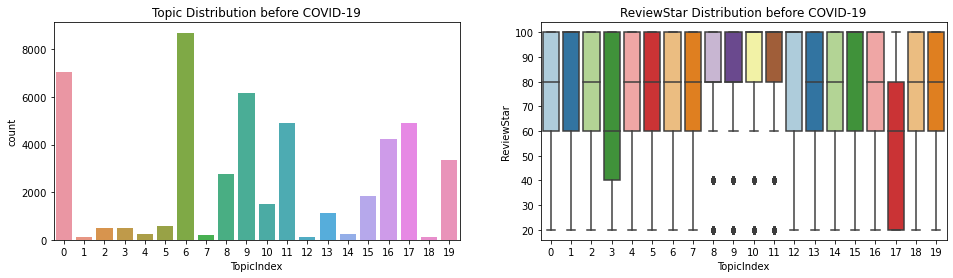

In [29]:
# Topic Distribution & ReviewStar Distribution before COVID-19

fig, ax = plt.subplots(1, 2, figsize=(16, 4))

plt.subplot(121)
sns.countplot(x=before_topic_table['TopicIndex'])
plt.title('Topic Distribution before COVID-19')

plt.subplot(122)
sns.boxplot(x='TopicIndex', y='ReviewStar', data=before_df, palette='Paired')
plt.title('ReviewStar Distribution before COVID-19')

plt.show()

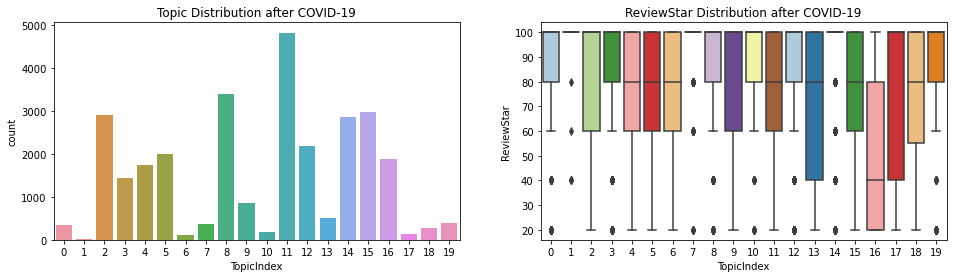

In [30]:
# Topic Distribution & ReviewStar Distribution after COVID-19

fig, ax = plt.subplots(1, 2, figsize=(16, 4))

plt.subplot(121)
sns.countplot(x=after_topic_table['TopicIndex'])
plt.title('Topic Distribution after COVID-19')

plt.subplot(122)
sns.boxplot(x='TopicIndex', y='ReviewStar', data=after_df, palette='Paired')
plt.title('ReviewStar Distribution after COVID-19')

plt.show()